# Question 1: Introduction

In [131]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the given address.
# Step 3. Assign it to a variable called users 
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, delimiter = '|')
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [132]:
# Step 4. Discover what is the mean age per occupation
ageMean = users.groupby(['occupation']).agg({'age':'mean'})
print("Average age per occupation")
print(ageMean)

Average age per occupation
                     age
occupation              
administrator  38.746835
artist         31.392857
doctor         43.571429
educator       42.010526
engineer       36.388060
entertainment  29.222222
executive      38.718750
healthcare     41.562500
homemaker      32.571429
lawyer         36.750000
librarian      40.000000
marketing      37.615385
none           26.555556
other          34.523810
programmer     33.121212
retired        63.071429
salesman       35.666667
scientist      35.548387
student        22.081633
technician     33.148148
writer         36.311111


In [133]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
df = users[['gender','occupation']]
male = df.loc[df['gender'] == 'M']
total = df.groupby('occupation').count()
male = male.groupby('occupation').count()
maleRatio = male / total
maleRatio.sort_values(by = 'gender', ascending = False)

,gender
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


In [134]:
# Step 6. For each occupation, calculate the minimum and maximum ages
minAge = users.groupby(['occupation']).agg({'age':'min'})
maxAge = users.groupby(['occupation']).agg({'age':'max'})
print("Minimum age per occupation:")
print(minAge)
print(' ')
print("Maximum age per occupation:")
print(maxAge)

Minimum age per occupation:
               age
occupation        
administrator   21
artist          19
doctor          28
educator        23
engineer        22
entertainment   15
executive       22
healthcare      22
homemaker       20
lawyer          21
librarian       23
marketing       24
none            11
other           13
programmer      20
retired         51
salesman        18
scientist       23
student          7
technician      21
writer          18
 
Maximum age per occupation:
               age
occupation        
administrator   70
artist          48
doctor          64
educator        63
engineer        70
entertainment   50
executive       69
healthcare      62
homemaker       50
lawyer          53
librarian       69
marketing       55
none            55
other           64
programmer      63
retired         73
salesman        66
scientist       55
student         42
technician      55
writer          60


In [128]:
# Step 7. For each combination of occupation and sex, calculate the mean age
meanAge = users.groupby(['occupation','gender']).agg({'age':'mean'})
print("Mean age by occupation and gender:")
print(meanAge)

Mean age by occupation and gender:
                            age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
     

In [130]:
# Step 8. For each occupation present the percentage of women and men
mfPercent = (users.groupby(['occupation', 'gender'])['gender'].count().groupby(level = 0).transform(lambda x: x/x.sum()*100))
print("Percentage of men and women for each occupation:")
print(mfPercent)

Percentage of men and women for each occupation:
occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.

# Question 2: Euro Teams

In [143]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the given address
# Step 3. Assign it to a variable called euro12
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url, delimiter = ',')
euro12.head(5)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [142]:
# Step 4. Select only the Goal column
goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [137]:
# Step 5. How many team participated in the Euro2012?
teamNum = len(euro12['Team'].unique())
print("Total number of teams that participated in Euro 2012:",teamNum)

Total number of teams that participated in Euro 2012: 16


In [139]:
# Step 6. What is the number of columns in the dataset?
print(" Total number of columns in the dataset:", len(euro12.columns))

 Total number of columns in the dataset: 35


In [144]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [146]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
sortRed = discipline.sort_values(by='Red Cards')
sortRed

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
7,Italy,16,0
8,Netherlands,5,0
10,Portugal,12,0
12,Russia,6,0


In [147]:
sortYellow = discipline.sort_values(by='Yellow Cards')
sortYellow

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
11,Republic of Ireland,6,1
12,Russia,6,0
1,Czech Republic,7,0
9,Poland,7,1


In [148]:
# Step 9.  Calculate the mean Yellow Cards given per Team
meanY=discipline['Yellow Cards'].mean()
print("Mean of yellow cards given per team is:", meanY)

Mean of yellow cards given per team is: 7.4375


In [150]:
# Step 10. Filter teams that scored more than 6 goalsStep 
goal6 = euro12[euro12['Goals'] > 6]
goal6

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [151]:
# Step 11. Select the teams that start with G
teamG = euro12[euro12["Team"].str.startswith("G")]
teamG

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [152]:
# Step 12. Select the first 7 columns
first7= euro12.iloc[:, :7]
first7

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [153]:
# Step 13. Select all columns except the last 3
teamCminus3 = euro12.iloc[:, :-3]
teamCminus3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [154]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
shootingAccuracy = euro12.loc[:,['Team','Shooting Accuracy']]
shootingAccuracy = shootingAccuracy.loc[[3,7,12],:]
print("Shooting Accuracy of England, Italy and Russia is:\n", shootingAccuracy)

Shooting Accuracy of England, Italy and Russia is:
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3: Housing

In [155]:
# Step 1. Import the necessary libraries
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000
import pandas as pd
import numpy as np
srs1 = pd.Series(np.random.randint(1,5,100))
srs2 = pd.Series(np.random.randint(1,4,100))
srs3 = pd.Series(np.random.randint(10000,30000,100))

In [156]:
# Step 3. Create a DataFrame by joinning the Series by column
jSrs = {"Series1": srs1,"Series2": srs2,"Series3": srs3}
jDF = pd.concat(jSrs, axis = 1)
jDF.head(5)

,Series1,Series2,Series3
0,3,3,19610
1,2,1,11824
2,4,1,12278
3,2,3,29869
4,3,2,11150


In [157]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
jDF.rename(columns = {'Series1' : 'bedrs', 'Series2' : 'bathrs', 'Series3' : 'price_sqr_meter'}, inplace = True)
jDF.head(5)

,bedrs,bathrs,price_sqr_meter
0,3,3,19610
1,2,1,11824
2,4,1,12278
3,2,3,29869
4,3,2,11150


In [158]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(jDF['bedrs'].astype(str) + jDF['bathrs'].astype(str) + jDF['price_sqr_meter'].astype(str))
bigcolumn

,0
0,3319610
1,2111824
2,4112278
3,2329869
4,3211150
...,...
95,1113601
96,4322878
97,1123177
98,3211330


In [ ]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
# Answer: Yes, it is true that the index is going until 99 only because the indexing is starting from 0.

In [159]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reindex(range(0, 300))

,0
0,3319610
1,2111824
2,4112278
3,2329869
4,3211150
...,...
295,NaN
296,NaN
297,NaN
298,NaN


# Question 4: Wind Statistics

The data have been modified to contain some missing values, identified by NaN.Using pandas should make this exercise easier, in particular for the bonus question.You should be able to perform all of these operations without using a for loop or 
other looping construct.The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.

In [165]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
import pandas as pd
import datetime
data = pd.read_fwf('wind.txt', parse_dates = [['Yr','Mo','Dy']])
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data.head(5)

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [167]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def correctYear(var):
    if var.year > 1979:
        year=var.year-100
    else:
        year = var.year
    return datetime.date(year,var.month,var.day)

data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(correctYear)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [168]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [169]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all 
#         calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [170]:
# Step 7. Compute how many non-missing values there are in total.
data.shape[0]-data.isnull().sum() 

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [171]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#         A single number for the entire dataset.
data.mean().mean() 

10.227982360836924

In [172]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of 
#         the windspeeds at each location over all the days
#         A different set of numbers for each location.
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [173]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of 
#          the windspeeds across all the locations at each day.
#          A different set of numbers for each day.
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [174]:
# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [176]:
# Step 12. Downsample the record to a yearly frequency for each location.
yfSample = data.resample('Y').ffill()
yfSample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


In [177]:
# Step 13. Downsample the record to a monthly frequency for each location.
mfSample = data.resample('M').ffill()
mfSample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67


In [178]:
# Step 14. Downsample the record to a weekly frequency for each location.
wfSample = data.resample('W').ffill()
wfSample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


In [180]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations 
#          for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
wStatus = wfSample.groupby(wfSample.index.to_period('W')).agg(['min','max','mean','std'])
wStatus.loc[wStatus.index[1:53], :]

RPT                      VAL                    \
                         min    max   mean std    min    max   mean std   
Yr_Mo_Dy                                                                  
1961-01-02/1961-01-08  10.96  10.96  10.96 NaN   9.75   9.75   9.75 NaN   
1961-01-09/1961-01-15  12.04  12.04  12.04 NaN   9.67   9.67   9.67 NaN   
1961-01-16/1961-01-22   9.59   9.59   9.59 NaN   5.88   5.88   5.88 NaN   
1961-01-23/1961-01-29    NaN    NaN    NaN NaN  23.91  23.91  23.91 NaN   
1961-01-30/1961-02-05  22.00  22.00  22.00 NaN  16.75  16.75  16.75 NaN   
1961-02-06/1961-02-12  16.00  16.00  16.00 NaN  16.92  16.92  16.92 NaN   
1961-02-13/1961-02-19  16.17  16.17  16.17 NaN  15.59  15.59  15.59 NaN   
1961-02-20/1961-02-26  25.80  25.80  25.80 NaN  21.50  21.50  21.50 NaN   
1961-02-27/1961-03-05  11.25  11.25  11.25 NaN  17.00  17.00  17.00 NaN   
1961-03-06/1961-03-12    NaN    NaN    NaN NaN  13.88  13.88  13.88 NaN   
1961-03-13/1961-03-19  11.42  11.42  11.42 NaN   9.46   9.46   9.46 NaN   
1961-03-20/1961-03-26  15.00  15.00  15.00 NaN  11.63  11.63  11.63 NaN   
1961-03-27/1961-04-02   7.62   7.62   7.62 NaN   4.25   4.25   4.25 NaN   
1961-04-03/1961-04-09  13.37  13.37  13.37 NaN  11.12  11.12  11.12 NaN   
1961-04-10/1961-04-16   4.71   4.71   4.71 NaN   7.00   7.00   7.00 NaN   
1961-04-17/1961-04-23  12.21  12.21  12.21 NaN   7.87   7.87   7.87 NaN   
1961-04-24/1961-04-30  11.67  11.67  11.67 NaN  11.00  11.00  11.00 NaN   
1961-05-01/1961-05-07  18.16  18.16  18.16 NaN  17.71  17.71  17.71 NaN   
1961-05-08/1961-05-14   9.25   9.25   9.25 NaN   6.54   6.54   6.54 NaN   
1961-05-15/1961-05-21   6.83   6.83   6.83 NaN   4.29   4.29   4.29 NaN   
1961-05-22/1961-05-28   9.96   9.96   9.96 NaN   7.67   7.67   7.67 NaN   
1961-05-29/1961-06-04   8.50   8.50   8.50 NaN   6.42   6.42   6.42 NaN   
1961-06-05/1961-06-11   8.29   8.29   8.29 NaN   6.83   6.83   6.83 NaN   
1961-06-12/1961-06-18  12.12  12.12  12.12 NaN   9.29   9.29   9.29 NaN   
1961-06-19/1961-06-25   9.00   9.00   9.00 NaN   8.25   8.25   8.25 NaN   
1961-06-26/1961-07-02  12.04  12.04  12.04 NaN   7.25   7.25   7.25 NaN   
1961-07-03/1961-07-09   7.29   7.29   7.29 NaN   5.71   5.71   5.71 NaN   
1961-07-10/1961-07-16  21.42  21.42  21.42 NaN  10.88  10.88  10.88 NaN   
1961-07-17/1961-07-23   3.04   3.04   3.04 NaN   3.71   3.71   3.71 NaN   
1961-07-24/1961-07-30   6.13   6.13   6.13 NaN  10.41  10.41  10.41 NaN   
1961-07-31/1961-08-06   8.38   8.38   8.38 NaN   6.71   6.71   6.71 NaN   
1961-08-07/1961-08-13  12.96  12.96  12.96 NaN   9.13   9.13   9.13 NaN   
1961-08-14/1961-08-20  13.75  13.75  13.75 NaN  13.62  13.62  13.62 NaN   
1961-08-21/1961-08-27  11.25  11.25  11.25 NaN  13.59  13.59  13.59 NaN   
1961-08-28/1961-09-03  11.63  11.63  11.63 NaN   7.29   7.29   7.29 NaN   
1961-09-04/1961-09-10   5.00   5.00   5.00 NaN   8.79   8.79   8.79 NaN   
1961-09-11/1961-09-17   5.33   5.33   5.33 NaN   7.12   7.12   7.12 NaN   
1961-09-18/1961-09-24   8.00   8.00   8.00 NaN   6.04   6.04   6.04 NaN   
1961-09-25/1961-10-01  14.25  14.25  14.25 NaN  12.87  12.87  12.87 NaN   
1961-10-02/1961-10-08  15.37  15.37  15.37 NaN  11.87  11.87  11.87 NaN   
1961-10-09/1961-10-15   7.79   7.79   7.79 NaN   6.87   6.87   6.87 NaN   
1961-10-16/1961-10-22  25.04  25.04  25.04 NaN  18.88  18.88  18.88 NaN   
1961-10-23/1961-10-29   4.33   4.33   4.33 NaN   2.75   2.75   2.75 NaN   
1961-10-30/1961-11-05  13.33  13.33  13.33 NaN  12.29  12.29  12.29 NaN   
1961-11-06/1961-11-12  14.83  14.83  14.83 NaN   9.87   9.87   9.87 NaN   
1961-11-13/1961-11-19  11.46  11.46  11.46 NaN   7.62   7.62   7.62 NaN   
1961-11-20/1961-11-26   6.25   6.25   6.25 NaN  10.04  10.04  10.04 NaN   
1961-11-27/1961-12-03  13.75  13.75  13.75 NaN  10.13  10.13  10.13 NaN   
1961-12-04/1961-12-10  23.71  23.71  23.71 NaN  21.37  21.37  21.37 NaN   
1961-12-11/1961-12-17  13.17  13.17  13.17 NaN   9.13   9.13   9.13 NaN   
1961-12-18/1961-12-24  20.54  20.54  20.54 NaN  13

# Question 5

In [85]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the given address.
# Step 3. Assign it to a variable called chipo.
# Step 4. See the first 10 entries
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = "\t")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [181]:
# Step 5. What is the number of observations in the dataset?
print( "Number of observations in the dataset are:",len(chipo))

Number of observations in the dataset are: 4622


In [182]:
# Step 6. What is the number of columns in the dataset?
print( "Number of columns in the dataset are:",len(chipo.columns))

Number of columns in the dataset are: 5


In [104]:
# Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [105]:
# Step 8. How is the dataset indexed?
# Python use 0-based indexing, hence indexing starts from 0 to total number -1. So in our dataset it will be 0 to 4621.
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [106]:
# Step 9. Which was the most-ordered item?
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).index[0]

'Chicken Bowl'

In [107]:
# Step 10. For the most-ordered item, how many items were ordered?
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity,item_price
item_name,,,
Chicken Bowl,713926,761,7342.73


In [108]:
# Step 11. What was the most ordered item in the choice_description column?
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

In [109]:
# Step 12. How many items were orderd in total?
chipo.quantity.sum()

4972

In [110]:
# Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type
def convert_to_float(num):
    return float(num[1:-1])

In [111]:
chipo.dtypes.item_price

dtype('float64')

In [114]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x))
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [115]:
# 14. How much was the revenue for the period in the dataset?

print("The total revenue is $", chipo['item_price'].sum())

The total revenue is $ 34500.16


In [116]:
# Step 15. How many orders were made in the period?
print("The number of orders made is", chipo['order_id'].nunique())

The number of orders made is 1834


In [120]:
# Step 16. What is the average revenue amount per order?
print("Average revenue amount per order is:")
print("\n")
print(chipo.groupby(['order_id']).agg({'item_price':'mean'}))

Average revenue amount per order is:


          item_price
order_id            
1           2.890000
2          16.980000
3           6.335000
4          10.500000
5           6.850000
...              ...
1830       11.500000
1831        4.300000
1832        6.600000
1833       11.750000
1834        9.583333

[1834 rows x 1 columns]


In [121]:
# Step 17. How many different items are sold?
print("Number of unique items sold are",chipo['item_name'].nunique())

Number of unique items sold are 50


# Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

Reference: https://indianaiproduction.com/matplotlib-line-plot/

In [50]:
# Importing librabries requied and read csv file.
import pandas as pd
import matplotlib.pyplot as plt
mrgInfo = pd.read_csv('us-marriages-divorces-1867-2014.csv')
mrgInfo.head(5)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


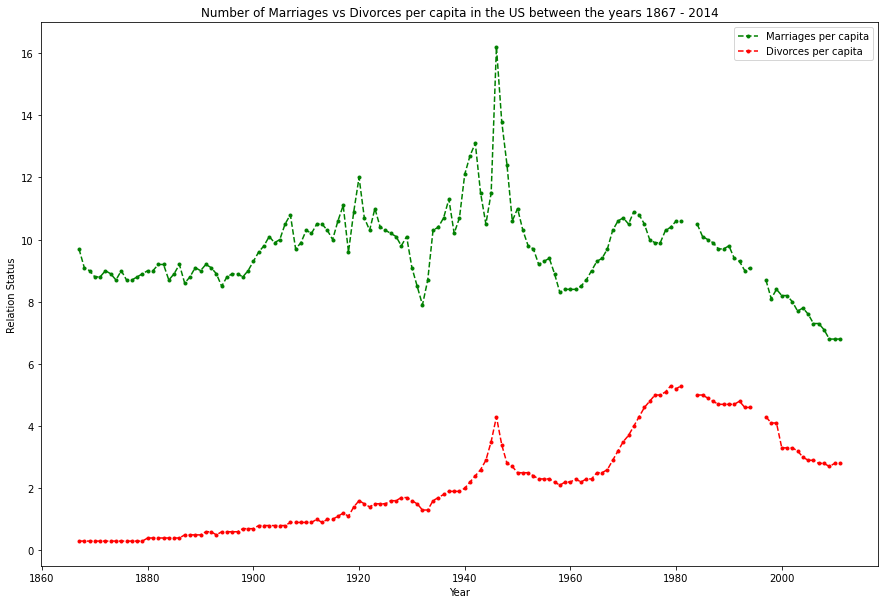

In [60]:
# Adding x-axis label
plt.xlabel("Year")  
# Adding y-axis label
plt.ylabel("Relation Status")  
plt.plot(mrgInfo['Year'], mrgInfo['Marriages_per_1000'], label = "Marriages per capita", color = "g", marker = "o", linestyle= "--", markersize = 3)
plt.plot(mrgInfo['Year'], mrgInfo['Divorces_per_1000'], label = "Divorces per capita", color = "r", marker = "o", linestyle= "--", markersize = 3)
# Adding legend
plt.legend(loc = "upper right")
# Adding title
plt.title("Number of Marriages vs Divorces per capita in the US between the years 1867 - 2014")  
plt.rcParams ["figure.figsize"] = (15,10)
plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Reference Link: https://indianaiproduction.com/matplotlib-bar-chart/

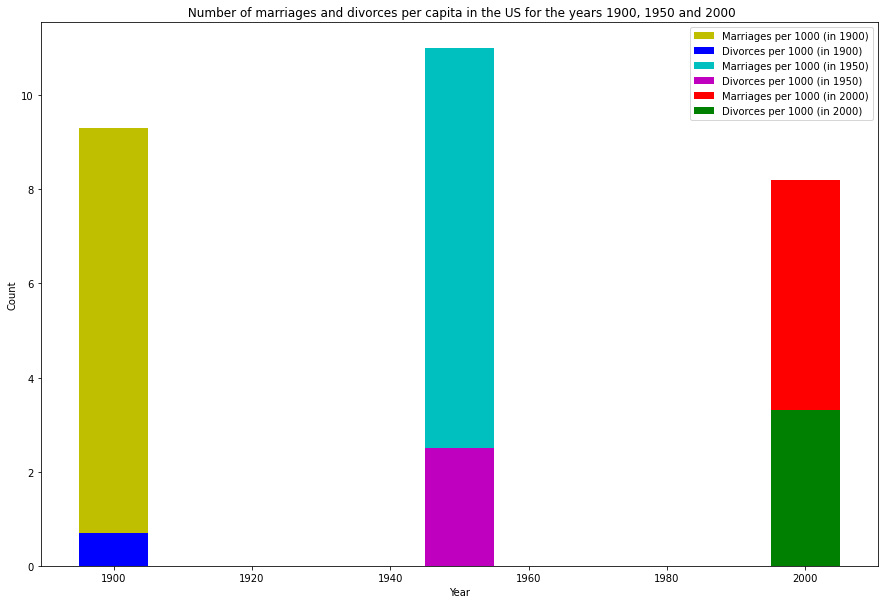

In [58]:
# Vertical Bar Graph
relatnStatus1900 = mrgInfo[mrgInfo['Year'] == 1900]
relatnStatus1950 = mrgInfo[mrgInfo['Year'] == 1950]
relatnStatus2000 = mrgInfo[mrgInfo['Year'] == 2000]

# Adding x-axis label 
plt.xlabel("Year") 
# Adding y-axis label
plt.ylabel("Count") 

plt.bar(relatnStatus1900['Year'], relatnStatus1900['Marriages_per_1000'], width = 10, label = 'Marriages per 1000 (in 1900)', color = "y")
plt.bar(relatnStatus1900['Year'], relatnStatus1900['Divorces_per_1000'], width = 10, label = 'Divorces per 1000 (in 1900)', color = "b")
plt.bar(relatnStatus1950['Year'], relatnStatus1950['Marriages_per_1000'], width = 10, label = 'Marriages per 1000 (in 1950)', color = "c")
plt.bar(relatnStatus1950['Year'], relatnStatus1950['Divorces_per_1000'], width = 10, label = 'Divorces per 1000 (in 1950)', color = "m")
plt.bar(relatnStatus2000['Year'], relatnStatus2000['Marriages_per_1000'], width = 10, label = 'Marriages per 1000 (in 2000)', color = "r")
plt.bar(relatnStatus2000['Year'], relatnStatus2000['Divorces_per_1000'], width = 10, label = 'Divorces per 1000 (in 2000)', color = "g")
 
# Adding legend
plt.legend(loc = "upper right")
# Adding title
plt.title(" Number of marriages and divorces per capita in the US for the years 1900, 1950 and 2000")
plt.rcParams ["figure.figsize"] = (15,10)
plt.show()

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

Reference Link: https://indianaiproduction.com/matplotlib-bar-chart/

In [70]:
# Importing librabries requied and read csv file.
import pandas as pd
import matplotlib.pyplot as plt
actorsHollywood = pd.read_csv('actor_kill_counts.csv')
actorsHollywood.head(10)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [71]:
# Sort the actor names by their kill count
killCount = actorsHollywood.sort_values(by = 'Count', ascending = True)
killCount.head(10)

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


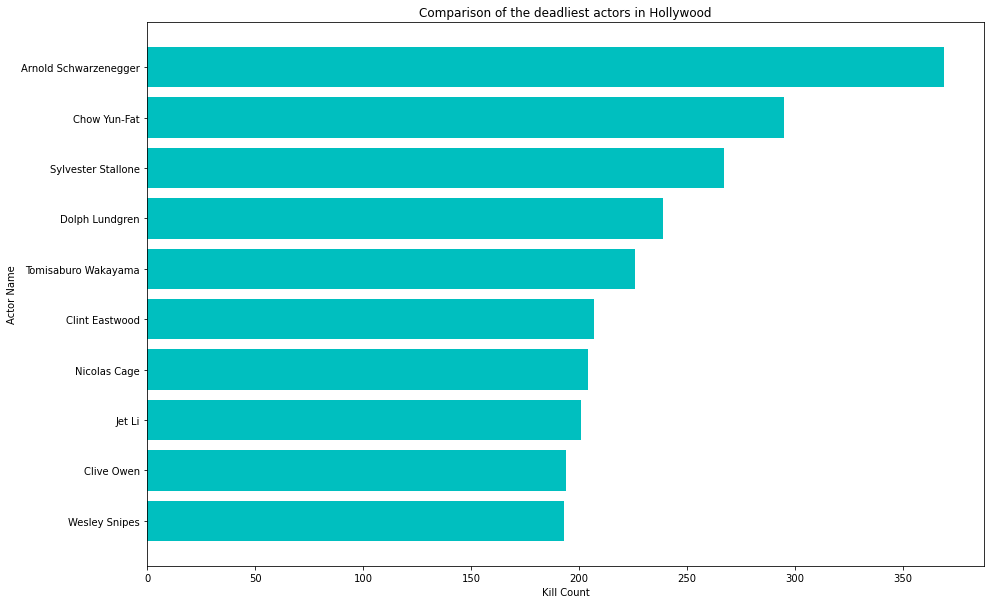

In [64]:
# Horizontal Bar Graph
plt.barh(killCount['Actor'], killCount['Count'], color='c')
# Adding x-axis label
plt.xlabel("Kill Count")
# Adding y-axis label
plt.ylabel("Actor Name") 
plt.title("Comparison of the deadliest actors in Hollywood")
plt.rcParams ["figure.figsize"] = (15,10)
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

Reference Link: https://indianaiproduction.com/matplotlib-pie-chart/

In [73]:
# Importing librabries requied and read csv file.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
romanEmperors = pd.read_csv('roman-emperor-reigns.csv')
romanEmperors.head(5)

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [76]:
# Percentage of deaths grouped by cause of death
perAssasin = romanEmperors.groupby(['Cause_of_Death'])['Cause_of_Death'].count().transform( lambda x: x/x.sum()*100)
perDeath = pd.DataFrame(perAssasin)
perDeath.rename(columns={'Cause_of_Death' : "Cause_of_death_Percentage" }, inplace = True)
display(perDeath.head(5))
perDeath['Cause_of_Death'] = perDeath.index

,Cause_of_death_Percentage
Cause_of_Death,
Assassinated,32.352941
Died in captivity,1.470588
Executed,4.411765
Illness,7.352941
Killed in battle,11.764706


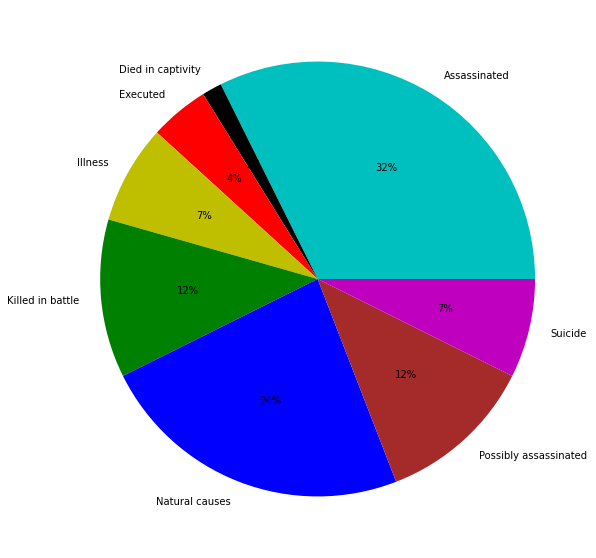

In [83]:
# Pie graph 
percent = perDeath['Cause_of_death_Percentage']
cause = perDeath['Cause_of_Death']
color = ['c','k','r','y','g','b','brown','m']
palette_color = sns.color_palette('dark')
plt.pie(percent, labels = cause, colors = color, autopct='%.0f%%') # plotting data on chart
plt.show()
plt.rcParams ["figure.figsize"] = (15,10)

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes!
Color each dot according to its year.

Reference Link: https://indianaiproduction.com/seaborn-scatter-plot/

In [68]:
# Importing librabries requied and read csv file.
import pandas as pd
import seaborn as sns
rd = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
rd.head(5)

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

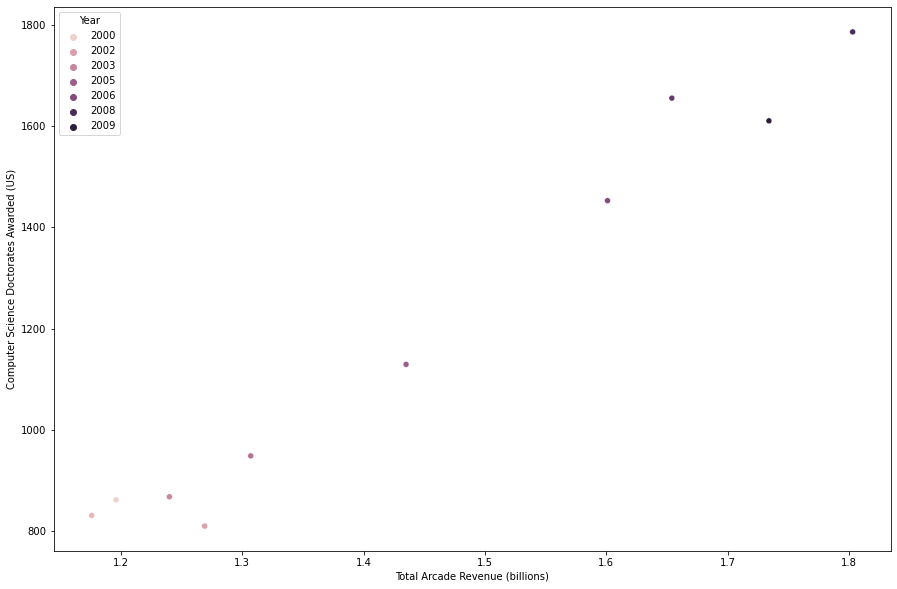

In [69]:
# Scatter Plot
sns.scatterplot(x = rd['Total Arcade Revenue (billions)'], y = rd['Computer Science Doctorates Awarded (US)'], data = rd, hue ='Year')